# Final Project - Firearm Seizure Metric
# Big Ideas in Computing and Information - University of Pittsburgh

### We can identify the safer neighborhoods based on Firearm Seizures in Pittsburgh. Based on the data gathered from the Western Pennsylvania Regional Data Center, we have access to all neighborhoods within Pittsburgh where Firearms seems to be more prevalent as well how Firearm seizures have increased or decreased over the years. Knowing where firearms have been seized can give an idea of where they are sourced from and what areas to avoid.

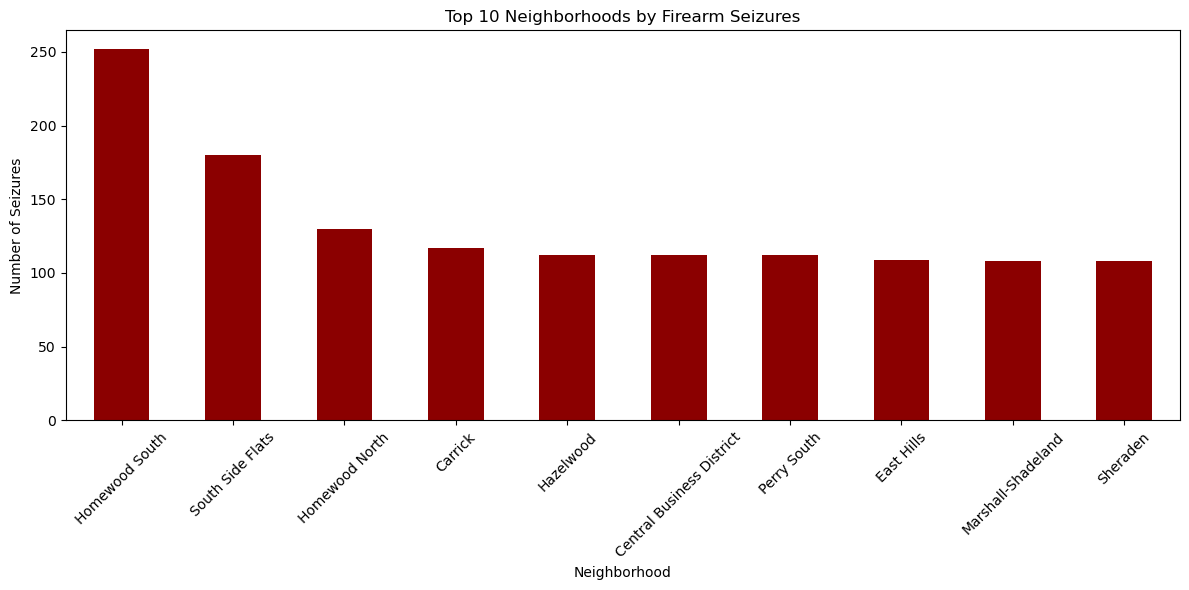

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#load dataset
firearm = pd.read_csv("data/firearms.csv")
firearm.head()

#keep important columns
columns_to_keep = ['neighborhood', 'council_district', 'ward', 'tract', 'police_zone', 'year']
firearm = firearm[columns_to_keep]

#remove missing data
firearm = firearm.dropna(subset=['neighborhood'])

#frequency of firearm seizures
neighborhood_counts = firearm['neighborhood'].value_counts()

#top 10 most seizures (worst for safety), vertical bar chart
plt.figure(figsize = (12, 6))
neighborhood_counts.sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'darkred')
plt.title('Top 10 Neighborhoods by Firearm Seizures')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Seizures')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Here we are able to see the Top 10 Neighborhoods with the most Firearm Seizures. Meaning these areas are not known to be safe.

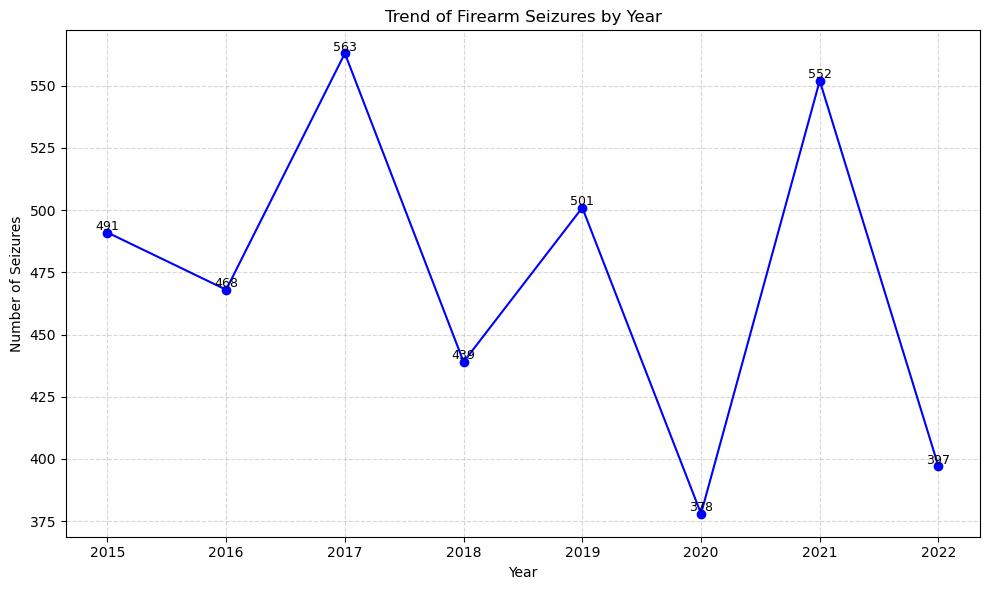

In [25]:
#firearm seizures by year, line plot
if 'year' in firearm.columns:
    year_counts = firearm['year'].value_counts().sort_index()

    plt.figure(figsize = (10, 6))
    plt.plot(year_counts.index, year_counts.values, marker = 'o', linestyle = '-', color = 'blue')
    plt.title('Trend of Firearm Seizures by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Seizures')
    for x, y in zip(year_counts.index, year_counts.values):
        plt.text(x, y + 1, str(y), ha = 'center', fontsize = 9)
    plt.grid(True, linestyle = '--', alpha = 0.5)
    plt.xticks(year_counts.index)
    plt.tight_layout()
    plt.show()

It is interesting to see that the number of firearm seizures vary greatly per year. It appears to flunctuate up every 2 years and back down.

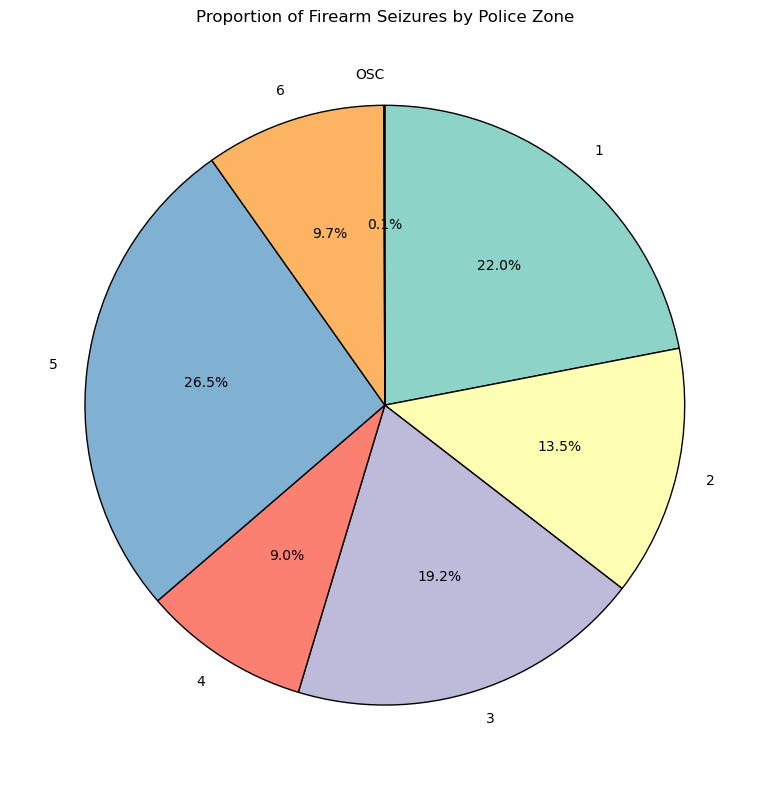

In [26]:
#Firearm seizures based on police zones, pie chart
if 'police_zone' in firearm.columns:
    zone_counts = firearm['police_zone'].value_counts().sort_index()

    plt.figure(figsize=(8, 8))
    zone_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, 
                         colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'black'})
    plt.title('Proportion of Firearm Seizures by Police Zone')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

Here, it is apparent that Police Zone #5 (East Liberty), followed by Police Zone #1 (North Side), has the most firearm seizures.

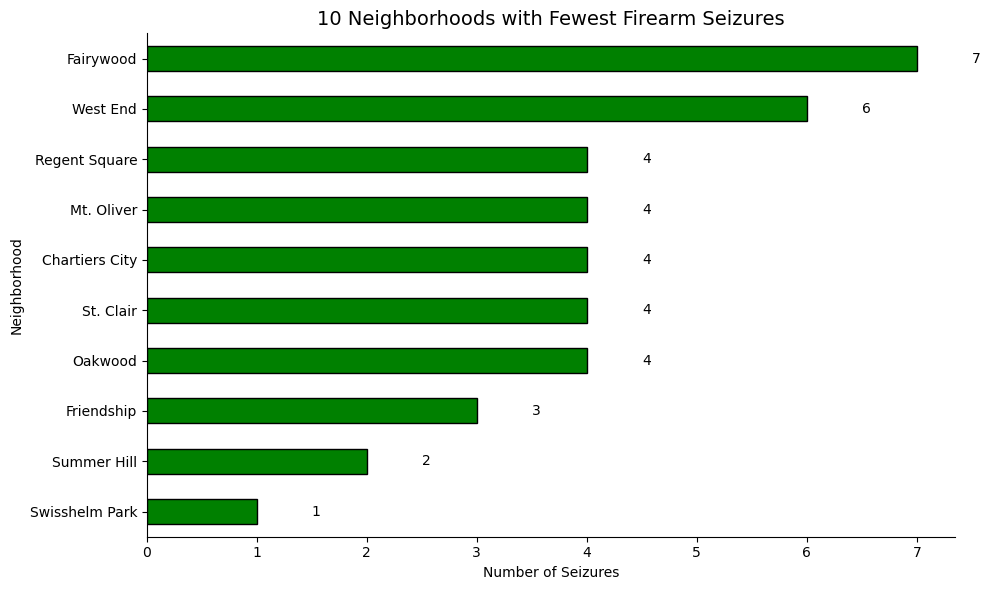

In [29]:
#bottom 10 seizures (best for safety), horizontal bar chart
bottom_10 = neighborhood_counts.sort_values().head(10)

plt.figure(figsize = (10, 6))
ax = bottom_10.plot(kind = 'barh', color = 'green', edgecolor = 'black')
plt.title('10 Neighborhoods with Fewest Firearm Seizures', fontsize = 14)
plt.xlabel('Number of Seizures')
plt.ylabel('Neighborhood')

for i, v in enumerate(bottom_10):
    plt.text(v + 0.5, i, str(v), va = 'center', fontsize = 10)

#remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

## Conclusion

As I am new to the area of Pittsburgh, I didn't have much knowledge as to what to expect in terms of frequency of firearm seizures in each neighborhood. I generally had a belief that the neighborhoods near Downtown or past Allegheny River and Monongahela River were known to be on the more dangerous end. I can see based on the data that the far east side of Pittsburgh campus is seen to be generally dangerous, which is shocking due to the fact that I frequent there to visit an animal shelter. It's difficult to assess from the exterior neighborhood where firearm activity is most prevalent, but this dataset allows us to use real evidence to identify those areas more accurately.